##  Electricity Demand Estimation For Leading Electricity Distributor </u>

In [1]:
import warnings
import itertools

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
file_location = 'C://Projects_python//Project_machinelearning//CaseStudy//Input//13. Capstone Case Study - Demand Estimation//'

In [3]:
file_name = 'Electricity Consumption.csv'

In [4]:
df = pd.read_csv(file_location + file_name)

In [5]:
df['DATE']=pd.to_datetime(df.DATE)

In [6]:
df['year']=df.DATE.dt.year
df['month']=df.DATE.dt.month

In [7]:
df.set_index('DATE',inplace=True)

In [8]:
consumption_data=df['Electricty_Consumption_in_TW']

Text(0, 0.5, 'Electricity consumption')

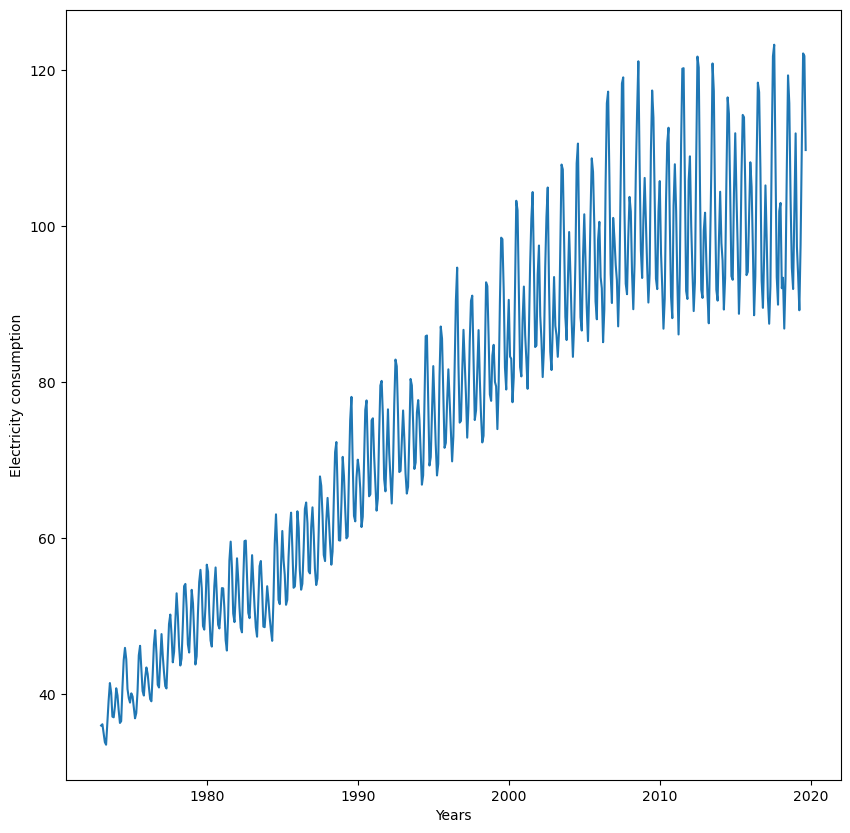

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(consumption_data)
plt.xlabel('Years')
plt.ylabel('Electricity consumption')

### Decomposition

In [10]:
decomposition = sm.tsa.seasonal_decompose(consumption_data, model='multiplicative',two_sided=False, extrapolate_trend=4)

In [11]:
decomposition.trend.head()

DATE
1973-01-01    34.092018
1973-02-01    34.357224
1973-03-01    34.622430
1973-04-01    34.887636
1973-05-01    35.152842
Name: trend, dtype: float64

In [12]:
decomposition.seasonal.head()

DATE
1973-01-01    1.054397
1973-02-01    0.996618
1973-03-01    0.946374
1973-04-01    0.891631
1973-05-01    0.919530
Name: seasonal, dtype: float64

In [13]:
decomposition.resid.head()

DATE
1973-01-01    1.000731
1973-02-01    1.055266
1973-03-01    1.070096
1973-04-01    1.087913
1973-05-01    1.036710
Name: resid, dtype: float64

In [14]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [15]:
decomp_output

,Electricty_Consumption_in_TW,trend,seasonal,resid
DATE,,,,
1973-01-01,35.9728,34.092018,1.054397,1.000731
1973-02-01,36.1334,34.357224,0.996618,1.055266
1973-03-01,35.0625,34.622430,0.946374,1.070096
1973-04-01,33.8416,34.887636,0.891631,1.087913
1973-05-01,33.5107,35.152842,0.919530,1.036710
...,...,...,...,...
2019-05-01,97.5860,101.805712,0.919530,1.042437
2019-06-01,110.8580,102.143504,1.030825,1.052862
2019-07-01,122.1014,102.417300,1.126577,1.058246


In [16]:
decomp_output['TSI'] = decomp_output.trend*decomp_output.seasonal*decomp_output.resid

In [17]:
decomp_output

,Electricty_Consumption_in_TW,trend,seasonal,resid,TSI
DATE,,,,,
1973-01-01,35.9728,34.092018,1.054397,1.000731,35.9728
1973-02-01,36.1334,34.357224,0.996618,1.055266,36.1334
1973-03-01,35.0625,34.622430,0.946374,1.070096,35.0625
1973-04-01,33.8416,34.887636,0.891631,1.087913,33.8416
1973-05-01,33.5107,35.152842,0.919530,1.036710,33.5107
...,...,...,...,...,...
2019-05-01,97.5860,101.805712,0.919530,1.042437,97.5860
2019-06-01,110.8580,102.143504,1.030825,1.052862,110.8580
2019-07-01,122.1014,102.417300,1.126577,1.058246,122.1014


In [18]:
forcasted_seasonality=decomp_output.seasonal[-24:-9]

In [19]:
x=np.array([x for x in range(1,562)])

In [20]:
from sklearn.linear_model import LinearRegression ## fitting the linear model on trend for forecasting 

In [21]:
reg=LinearRegression()

In [22]:
reg.fit(x.reshape([-1,1]),decomp_output.trend)

LinearRegression()

In [23]:
start_date = '2019-10-1'
end_date = '2021-1'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

### forecasting for next 15 months using decomposition method 

In [24]:
pd.DataFrame(reg.predict(np.array([x for x in range (562,577)]).reshape([-1,1])) * np.array(forcasted_seasonality),columns=['Forecasted consumption for next 15 months'],index=date_range)

,Forecasted consumption for next 15 months
2019-10-31,105.890516
2019-11-30,104.579342
2019-12-31,113.470078
2020-01-31,119.724112
2020-02-29,113.295571
2020-03-31,107.709212
2020-04-30,101.596980
2020-05-31,104.897789
2020-06-30,117.730744
2020-07-31,128.815893


### Dickey-Fuller Test 

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
consumption_data

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [27]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(consumption_data)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.740593
p-value                          0.410328
#lags Used                      15.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64


- with differencing of 1

In [28]:
consumption_data_diff1=consumption_data.diff(1)
consumption_data_diff1.dropna(inplace=True)

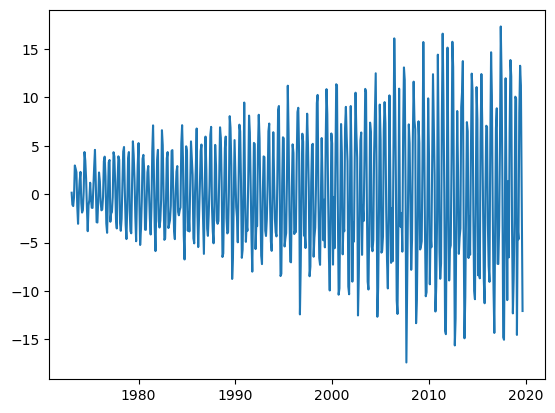

In [29]:
plt.plot(consumption_data_diff1)

In [30]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(consumption_data_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.941665e+00
p-value                        3.301344e-12
#lags Used                     1.400000e+01
Number of Observations Used    5.450000e+02
Critical Value (1%)           -3.442406e+00
Critical Value (5%)           -2.866858e+00
Critical Value (10%)          -2.569602e+00
dtype: float64


- with taking log 

In [31]:
consumption_data_log=np.log10(consumption_data)

In [32]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(consumption_data_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.001867
p-value                          0.034720
#lags Used                      15.000000
Number of Observations Used    545.000000
Critical Value (1%)             -3.442406
Critical Value (5%)             -2.866858
Critical Value (10%)            -2.569602
dtype: float64


- with taking log and differencing of 1

In [33]:
consumption_data_log_diff1=consumption_data_log.diff(1)
consumption_data_log_diff1.dropna(inplace=True)

In [34]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(consumption_data_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.884810e+00
p-value                        1.403418e-09
#lags Used                     1.400000e+01
Number of Observations Used    5.450000e+02
Critical Value (1%)           -3.442406e+00
Critical Value (5%)           -2.866858e+00
Critical Value (10%)          -2.569602e+00
dtype: float64


In [35]:
### since the p value comes out to be much less hence we choose d=1 for our model

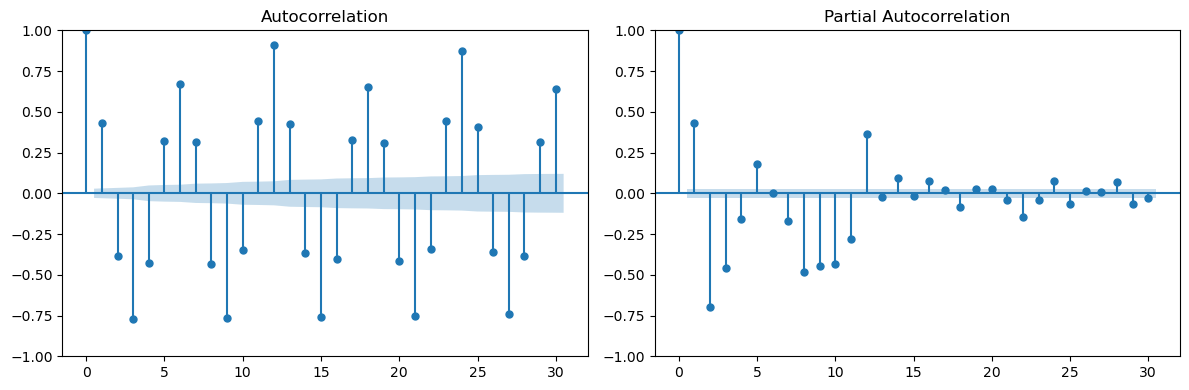

In [36]:
## finding value of p and q using acf and pacf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(consumption_data_diff1, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(consumption_data_diff1, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

### ARIMA MODEL 

In [37]:
from statsmodels.tsa.arima.model import ARIMA

In [38]:
consumption_data_log

DATE
1973-01-01    1.555974
1973-02-01    1.557909
1973-03-01    1.544843
1973-04-01    1.529451
1973-05-01    1.525183
                ...   
2019-05-01    1.989388
2019-06-01    2.044767
2019-07-01    2.086721
2019-08-01    2.085563
2019-09-01    2.040282
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [39]:
consumption_data_log_train=consumption_data_log.iloc[:500]
consumption_data_log_test=consumption_data_log.iloc[500:]

In [40]:
model = ARIMA(consumption_data_log_train, order=(2,0,2))
model_fit = model.fit()

C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
# summary of fit model
print(model_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  500
Model:                           ARIMA(2, 0, 2)   Log Likelihood                1178.556
Date:                          Fri, 26 Apr 2024   AIC                          -2345.112
Time:                                  22:51:47   BIC                          -2319.825
Sample:                              01-01-1973   HQIC                         -2335.189
                                   - 08-01-2014                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8474      0.031     60.161      0.000       1.787       1.908
ar.L1          1.4745      0.068     21.713      0.

In [42]:
pred_99=model_fit.get_forecast(steps=61,alpha=0.05)

C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [43]:
forecasted_y=pred_99.predicted_mean

In [44]:
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [45]:
mean_absolute_error(consumption_data_log_test,forecasted_y)

0.04552901587158257

In [46]:
mean_absolute_percentage_error(consumption_data_log_test,forecasted_y)

0.02236474116449593

In [47]:
mean_squared_error(consumption_data_log_test,forecasted_y)

0.0034989290776042846

In [48]:
model_best = ARIMA(consumption_data_log, order=(2,0,2))
model_fit_best = model_best.fit()

C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
model_fit_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     Electricty_Consumption_in_TW   No. Observations:                  561
Model:                           ARIMA(2, 0, 2)   Log Likelihood                1275.196
Date:                          Fri, 26 Apr 2024   AIC                          -2538.393
Time:                                  22:51:50   BIC                          -2512.415
Sample:                              01-01-1973   HQIC                         -2528.250
                                   - 09-01-2019                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8435      0.021     87.031      0.000       1.802       1.885
ar.L1          1.3672      0.091     15.002      0.000       1.189       1.546
ar.L2         -0.3816      0.086     -4.454      0.000      -0.550      -0.214
ma.L1          0.0180      0.080      0.224      0.823      -0.140       0.176
ma.L2         -0.6459      0.063    -10.258      0.000      -0.769      -0.523
sigma2         0.0006   5.38e-05     11.385      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   3.44   Jarque-Bera (JB):                 4.37
Prob(Q):                              0.06   Prob(JB):                         0.11
Heteroskedasticity (H):               1.87   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
## n_steps = 25
pred_uc_99 = model_fit_best.get_forecast(steps=25, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = model_fit_best.get_forecast(steps=25, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [51]:
n_steps = 25
idx = pd.date_range(consumption_data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [52]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2019-09-01,106.025718,94.821967,118.553254,94.821967,118.553254
2019-10-01,103.663635,85.657290,125.455163,85.657290,125.455163
2019-11-01,102.189402,82.508993,126.564070,82.508993,126.564070
2019-12-01,101.073031,80.619229,126.716140,80.619229,126.716140
2020-01-01,100.112195,79.163904,126.603805,79.163904,126.603805


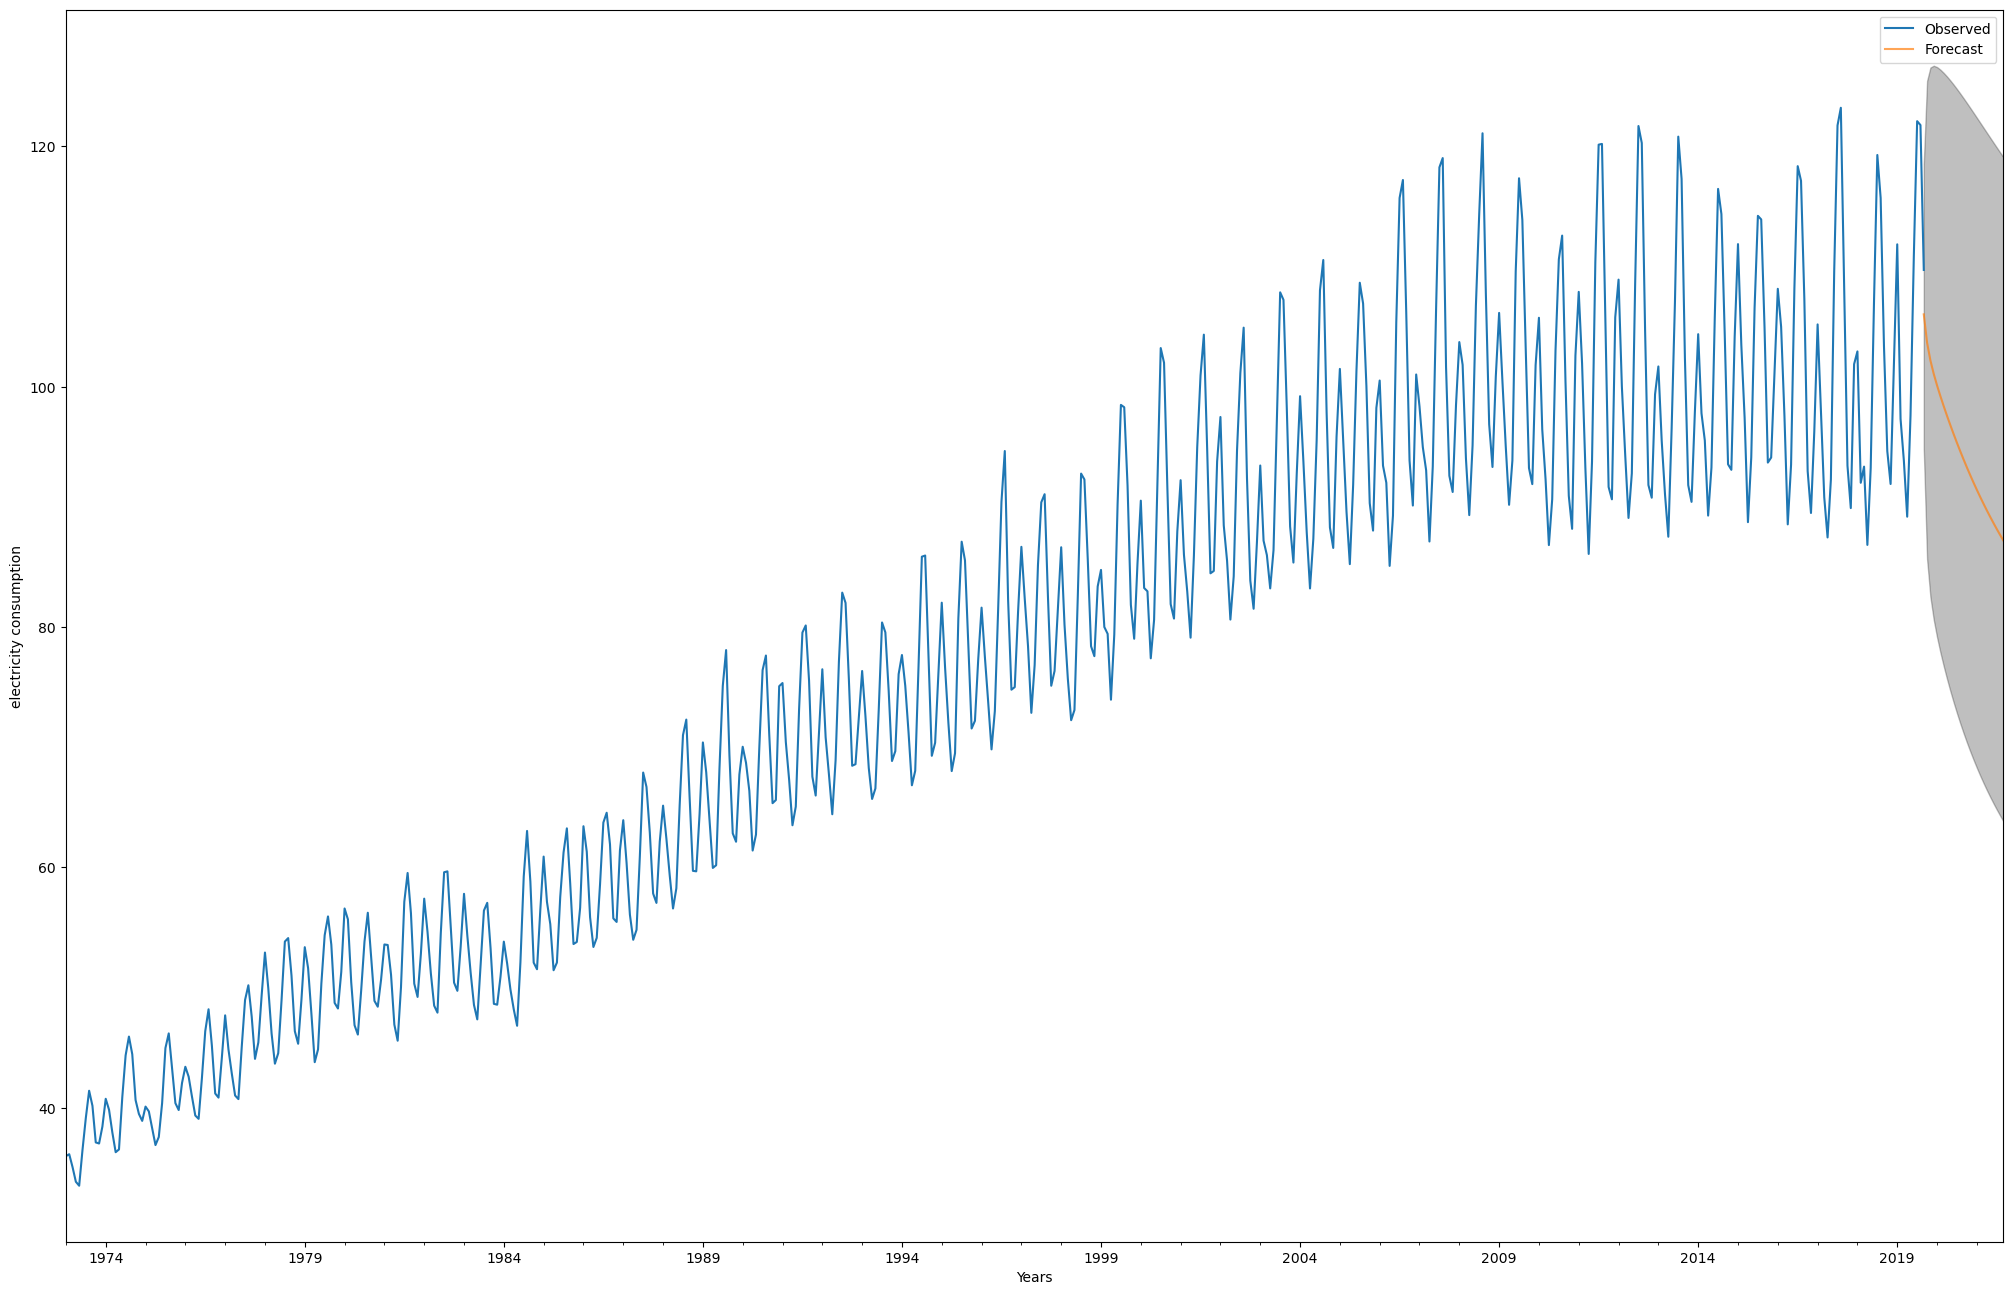

In [53]:
axis = consumption_data.plot(label='Observed', figsize=(25, 16))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('electricity consumption')
plt.legend(loc='best')
plt.show()

### SARIMA MODEL WITH VARIOUS VALUES OF P,D,Q AND p,d,q

In [54]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [55]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [56]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(consumption_data_log_train,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 model - AIC:-3171.9196509449234


### Best model after hyperparameter tuning

In [57]:
model = sm.tsa.statespace.SARIMAX(consumption_data_log_train, order = (2,2,2), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

results = model.fit()

print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:         Electricty_Consumption_in_TW   No. Observations:                  500
Model:             SARIMAX(2, 2, 2)x(1, 0, [1], 12)   Log Likelihood                1592.960
Date:                              Fri, 26 Apr 2024   AIC                          -3171.920
Time:                                      22:54:33   BIC                          -3142.660
Sample:                                  01-01-1973   HQIC                         -3160.421
                                       - 08-01-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4381      0.101      4.338      0.000       0.240       0.636
ar.L2         -0.20

In [58]:
pred_uct_99 = results.get_forecast(steps=61, alpha=0.01)

In [59]:
forecasted_y_sarima=pred_uct_99.predicted_mean

In [60]:
mean_absolute_percentage_error(consumption_data_log_test,forecasted_y_sarima)

0.011568829413857375

In [61]:
mean_absolute_error(consumption_data_log_test,forecasted_y_sarima)

0.02327426121670179

In [62]:
mean_squared_error(consumption_data_log_test,forecasted_y_sarima)

0.0006892741182893258

### forecasting for next 2 years 

In [63]:
model_final = sm.tsa.statespace.SARIMAX(consumption_data_log, order = (2,2,2), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

best_results = model_final.fit()

In [64]:
## n_steps = 25
pred_uc_99 = best_results.get_forecast(steps=25, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=25, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [65]:
n_steps = 25
idx = pd.date_range(consumption_data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [66]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2019-09-01,96.552332,92.716426,100.546939,92.716426,100.546939
2019-10-01,93.926677,89.157395,98.951081,89.157395,98.951081
2019-11-01,104.204961,98.494907,110.246045,98.494907,110.246045
2019-12-01,110.478817,104.126774,117.218353,104.126774,117.218353
2020-01-01,101.397899,95.283272,107.904920,95.283272,107.904920


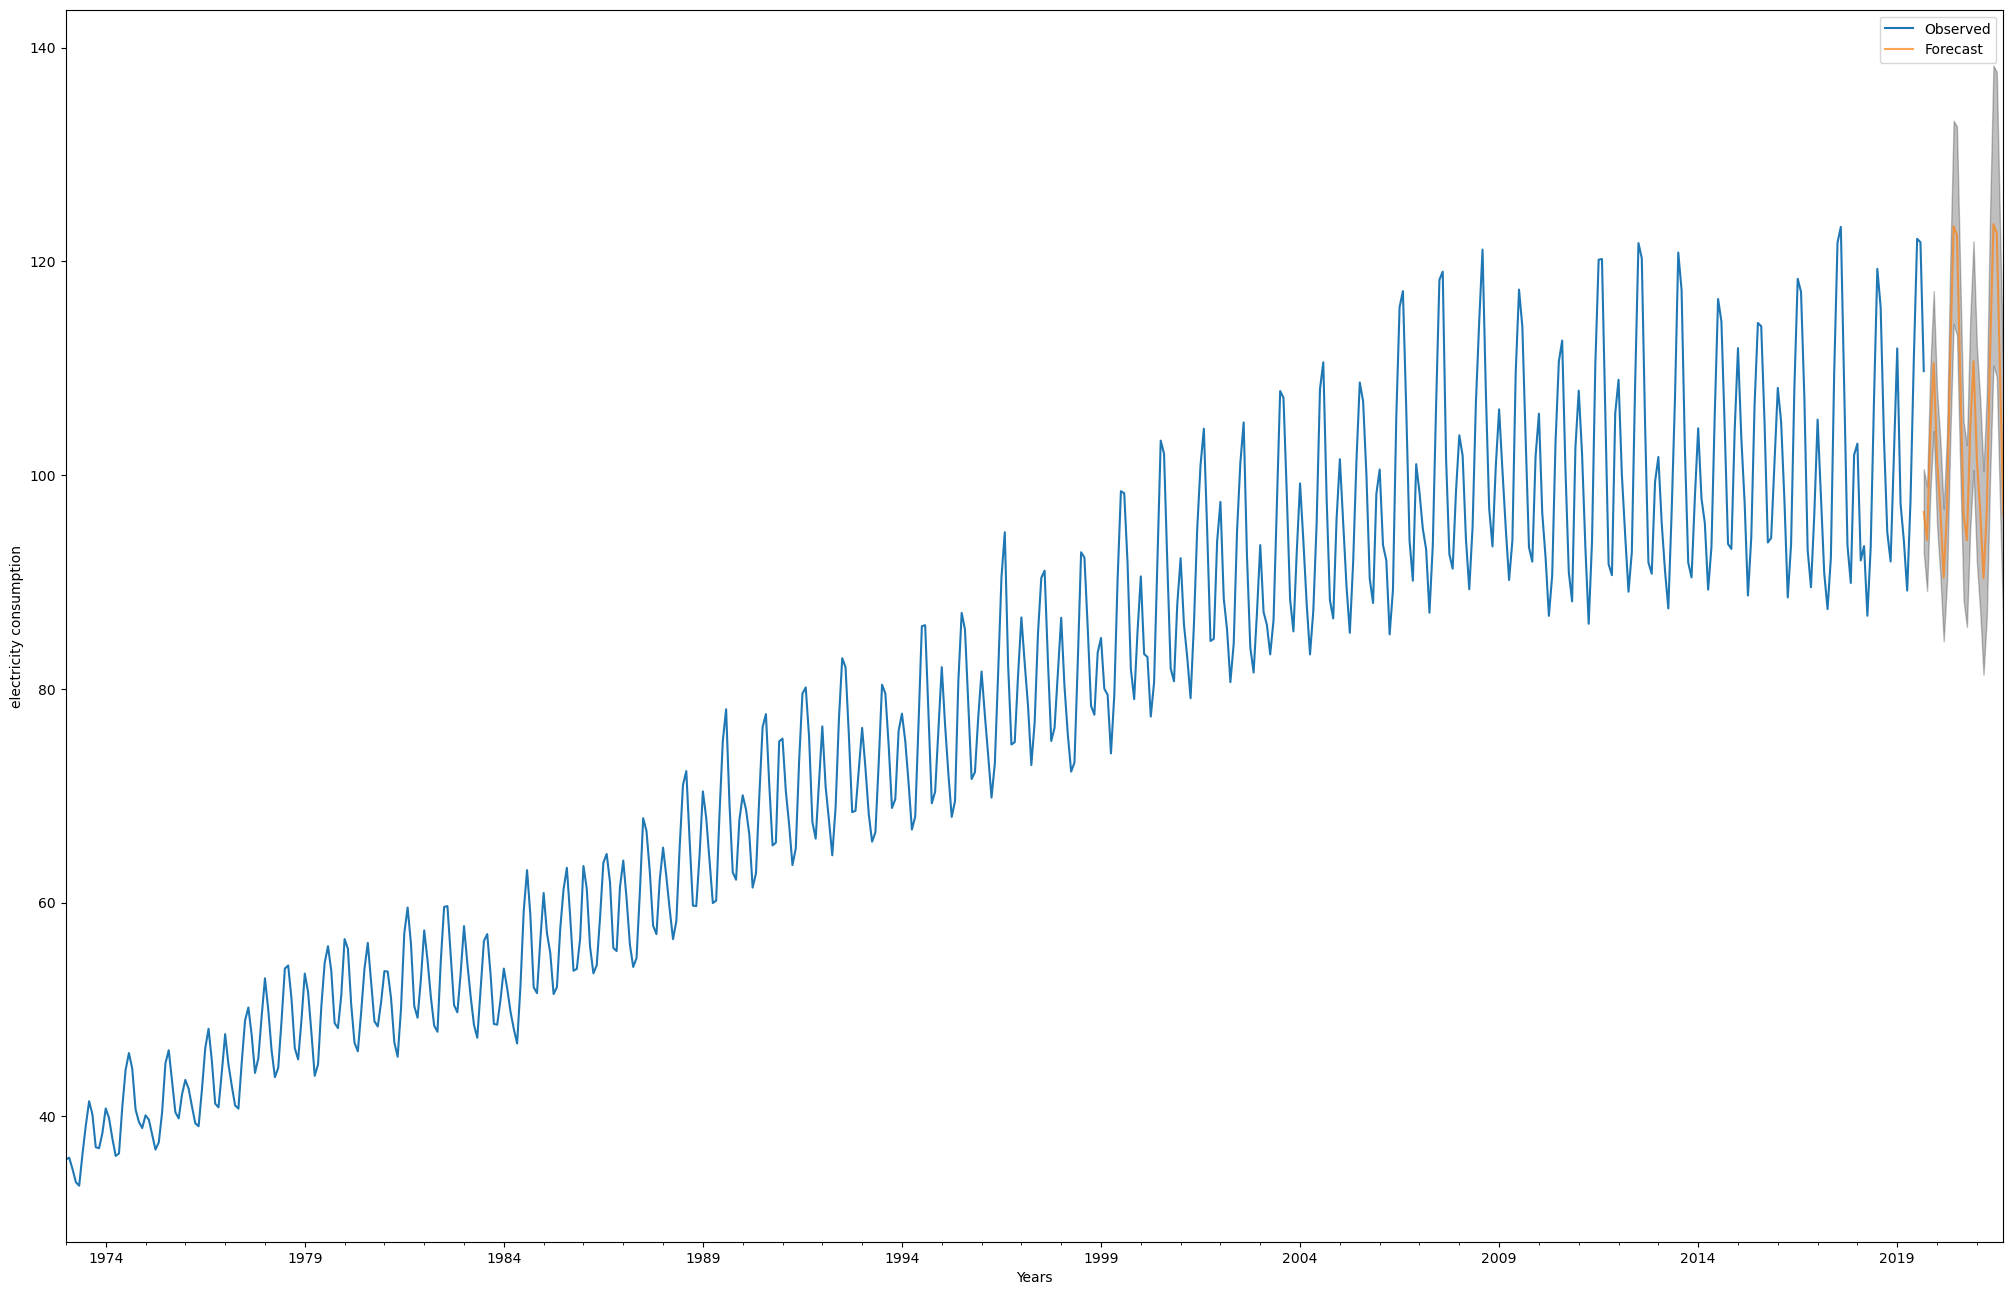

In [67]:
axis = consumption_data.plot(label='Observed', figsize=(25, 16))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('electricity consumption')
plt.legend(loc='best')
plt.show()

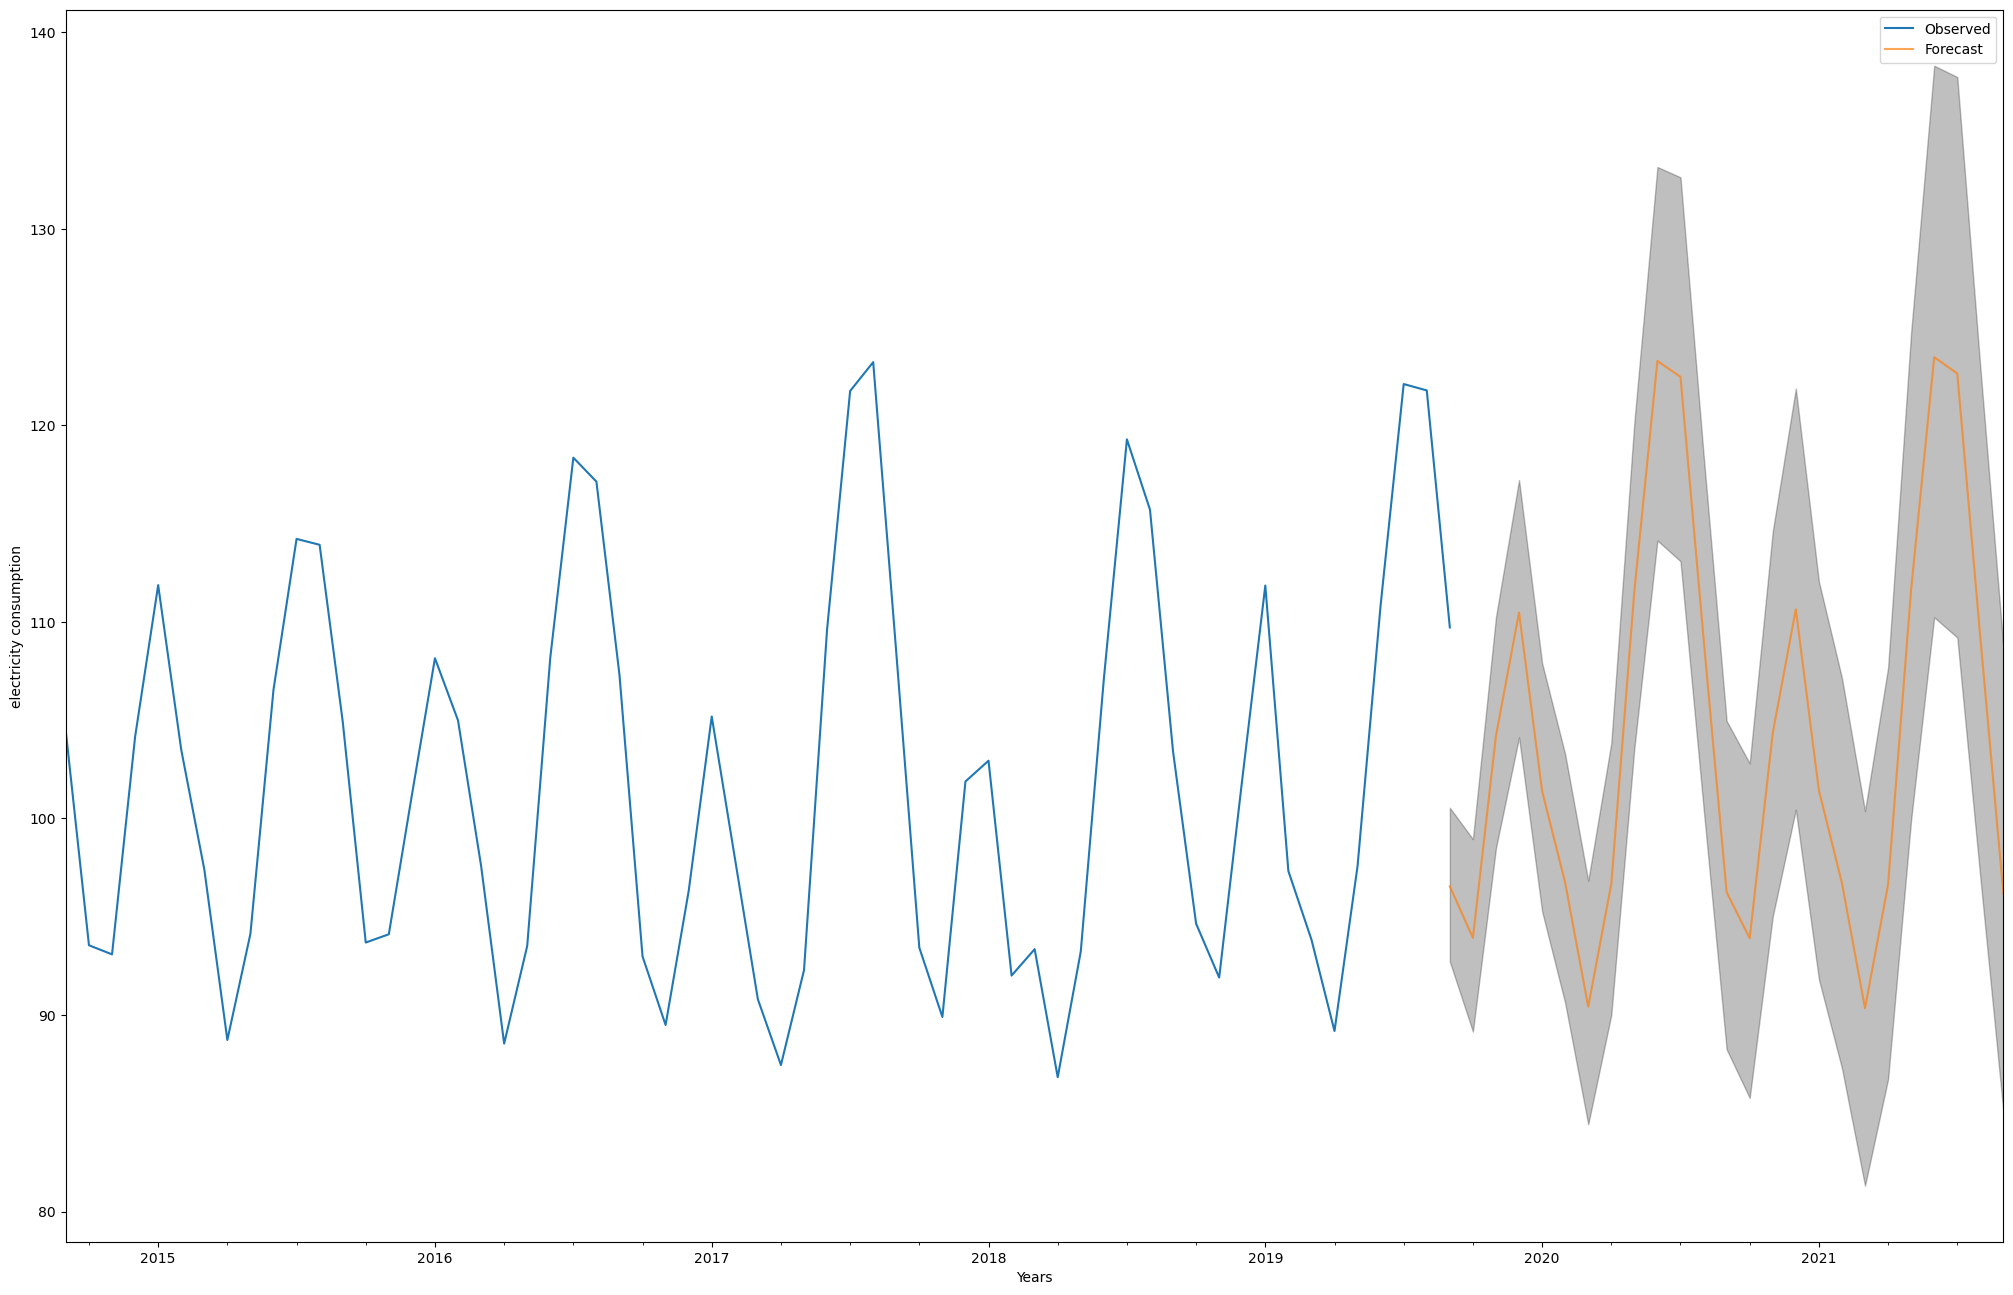

In [68]:
axis = consumption_data.iloc[500:].plot(label='Observed', figsize=(25, 16))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('electricity consumption')
plt.legend(loc='best')
plt.show()